# Algoritmos de optimización - Reto 1

Nombre: Pedro Luis Soto Santos </br>
Github: https://github.com/plss12/03MAIR---Algoritmos-de-Optimizacion/blob/main/Reto%201/Algoritmos_R1.ipynb

In [19]:
import time
import matplotlib.pyplot as plt

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás. 

In [39]:
# Torres de Hanoi

def torre_hanoi(n, origen, destino, auxiliar, num_movs=0):
    if n == 1:
        print(f"Mover disco de {origen} a {destino}")
        return num_movs+1
    else:
        num_movs = torre_hanoi(n-1, origen, auxiliar, destino, num_movs)
        print(f"Mover disco de {origen} a {destino}")
        num_movs = torre_hanoi(n-1, auxiliar, destino, origen, num_movs)
    return num_movs+1

num_fichas = 5
num_movs = torre_hanoi(num_fichas, "Torre A", "Torre C", "Torre B")

print(f"Numero de movimientos para una torre de Hanoi de {num_fichas} fichas: {num_movs}")

Mover disco de Torre A a Torre C
Mover disco de Torre A a Torre B
Mover disco de Torre C a Torre B
Mover disco de Torre A a Torre C
Mover disco de Torre B a Torre A
Mover disco de Torre B a Torre C
Mover disco de Torre A a Torre C
Mover disco de Torre A a Torre B
Mover disco de Torre C a Torre B
Mover disco de Torre C a Torre A
Mover disco de Torre B a Torre A
Mover disco de Torre C a Torre B
Mover disco de Torre A a Torre C
Mover disco de Torre A a Torre B
Mover disco de Torre C a Torre B
Mover disco de Torre A a Torre C
Mover disco de Torre B a Torre A
Mover disco de Torre B a Torre C
Mover disco de Torre A a Torre C
Mover disco de Torre B a Torre A
Mover disco de Torre C a Torre B
Mover disco de Torre C a Torre A
Mover disco de Torre B a Torre A
Mover disco de Torre B a Torre C
Mover disco de Torre A a Torre C
Mover disco de Torre A a Torre B
Mover disco de Torre C a Torre B
Mover disco de Torre A a Torre C
Mover disco de Torre B a Torre A
Mover disco de Torre B a Torre C
Mover disc

## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos. 

In [14]:
#Sucesión_de_Fibonacci

def fibonacci_iterativo(n):
    if n <=1:
        return n
        
    n0, n1 = 0, 1
    for _ in range(2, n+1):
        n0, n1 = n1, n0+n1
    return n1

def fibonacci_recursivo(n):
    if n <=1:
        return n
    
    return fibonacci_recursivo(n-1)+fibonacci_recursivo(n-2)

def fibonacci_recursivo_memorizado(n, memo={}):
    if n <=1:
        return n
    
    if n in memo:
        return memo[n]
    
    memo[n] = fibonacci_recursivo_memorizado(n-1) + fibonacci_recursivo_memorizado(n-2)
    return memo[n]

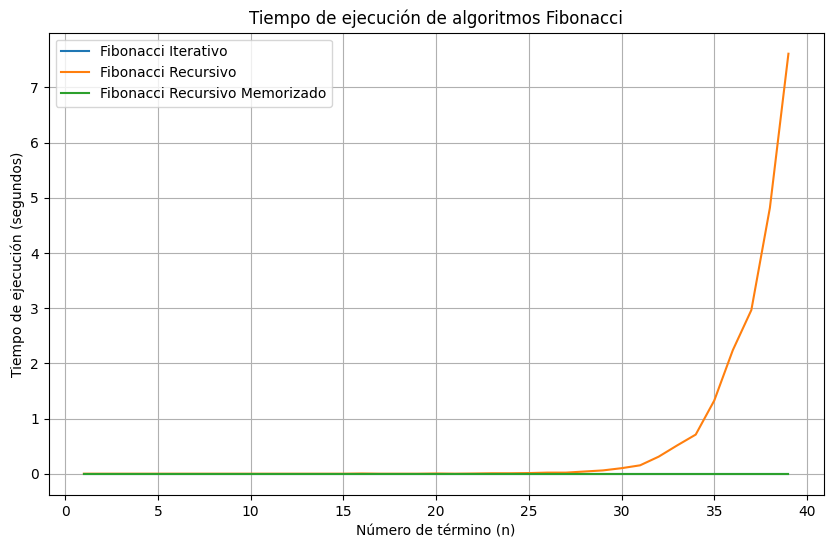

In [40]:
# Rango de valores de n para probar
valores_n = list(range(1, 40))

# Listas para almacenar los tiempos de ejecución
tiempos_iterativo = []
tiempos_recursivo = []
tiempos_recursivo_memorizado = []

# Medir el tiempo para el algoritmo iterativo
for n in valores_n:
    inicio = time.time()
    fibonacci_iterativo(n)
    fin = time.time()
    tiempos_iterativo.append(fin - inicio)

# Medir el tiempo para el algoritmo recursivo
for n in valores_n:
    inicio = time.time()
    fibonacci_recursivo(n)
    fin = time.time()
    tiempos_recursivo.append(fin - inicio)

# Medir el tiempo para el algoritmo recursivo memorizado
for n in valores_n:
    inicio = time.time()
    fibonacci_recursivo_memorizado(n)
    fin = time.time()
    tiempos_recursivo_memorizado.append(fin - inicio)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(valores_n, tiempos_iterativo, label='Fibonacci Iterativo')
plt.plot(valores_n, tiempos_recursivo, label='Fibonacci Recursivo')
plt.plot(valores_n, tiempos_recursivo_memorizado, label='Fibonacci Recursivo Memorizado')
plt.xlabel('Número de término (n)')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de algoritmos Fibonacci')
plt.legend()
plt.grid(True)
plt.show()

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [9]:
# Problema del cambio de moneda

def cambio_monedas(cantidad, sistema):
    res = [0 for _ in range(len(sistema))]
    for i, valor in enumerate(sistema):
        res[i] = cantidad // valor
        cantidad %= valor
    return res

def cambio_monedas(cantidad, sistema):
    res = []
    sistema.sort(reverse=True)

    for moneda in sistema:
        while cantidad >= moneda:
            res.append(moneda)
            cantidad -= moneda
    return res

sistema = [50, 20, 10, 5, 2, 1]
print(cambio_monedas(79, sistema))

[50, 20, 5, 2, 2]


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [5]:
# Problema de las N-Reinas




